<a href="https://colab.research.google.com/github/allanbispo/Redes-Neurais-CESAR-School/blob/2023.02/apsb_3_4_LogisticRegressionMNIST_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ATIVIDADE AULA 3.4**

## **CESAR SCHOOL**
* Pós-graduação em Engenharia e Análise de Dados - 2023.2
* **Disciplina: RNA e Deep Learning**
* Professor: **Vitor Casadei**
* Aluno: **Allan Bispo** - apsb@cesar.school

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34377223.73it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1024420.66it/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9675362.97it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5720879.51it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Número de minibatches de treinamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [4]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [6]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.3630,  0.2915,  0.7563, -0.0030, -0.1569, -0.3417, -0.7914,  0.0796,
          0.1791,  0.2211]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [7]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [18]:
epochs = []
losses = []

total_trained_samples = 0

for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f"Época: {i}/{n_epochs - 1}, batch: {k+1}/{len(loader_train)}")

Época: 0/4, batch: 1/600
Época: 0/4, batch: 2/600
Época: 0/4, batch: 3/600
Época: 0/4, batch: 4/600
Época: 0/4, batch: 5/600
Época: 0/4, batch: 6/600
Época: 0/4, batch: 7/600
Época: 0/4, batch: 8/600
Época: 0/4, batch: 9/600
Época: 0/4, batch: 10/600
Época: 0/4, batch: 11/600
Época: 0/4, batch: 12/600
Época: 0/4, batch: 13/600
Época: 0/4, batch: 14/600
Época: 0/4, batch: 15/600
Época: 0/4, batch: 16/600
Época: 0/4, batch: 17/600
Época: 0/4, batch: 18/600
Época: 0/4, batch: 19/600
Época: 0/4, batch: 20/600
Época: 0/4, batch: 21/600
Época: 0/4, batch: 22/600
Época: 0/4, batch: 23/600
Época: 0/4, batch: 24/600
Época: 0/4, batch: 25/600
Época: 0/4, batch: 26/600
Época: 0/4, batch: 27/600
Época: 0/4, batch: 28/600
Época: 0/4, batch: 29/600
Época: 0/4, batch: 30/600
Época: 0/4, batch: 31/600
Época: 0/4, batch: 32/600
Época: 0/4, batch: 33/600
Época: 0/4, batch: 34/600
Época: 0/4, batch: 35/600
Época: 0/4, batch: 36/600
Época: 0/4, batch: 37/600
Época: 0/4, batch: 38/600
Época: 0/4, batch: 39

In [9]:
print('Final loss:', loss.data)

Final loss: tensor(0.3390)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

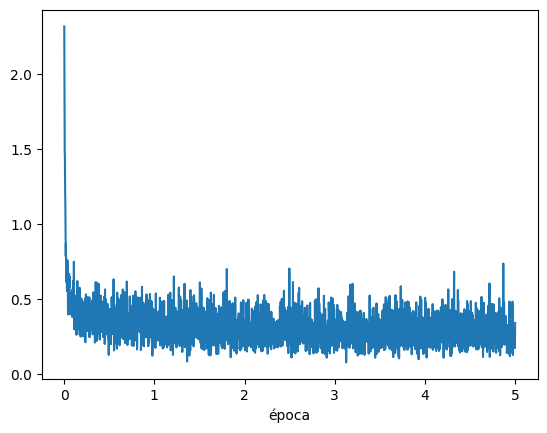

In [10]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

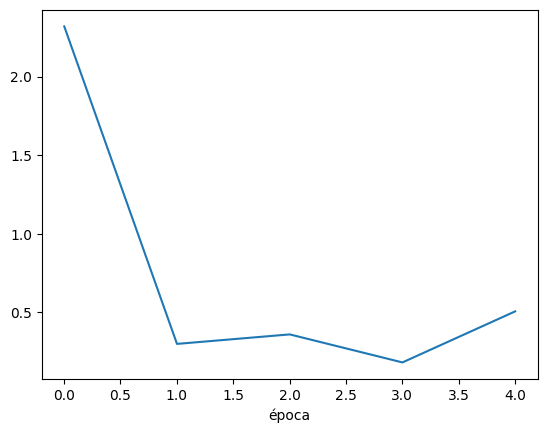

In [11]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
  * `apsb`: cada mini-batch tem 100 amostras.
2. Em uma época, quantos mini-batches existem?
  * `apsb`: cada época tem 600 mini-batches.
3. Qual é a definição de época?
  * `apsb`: época representa a quantidade de passagens por todo o conjunto de treinamento será feita durante o modelamento.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
      * `apsb`: inserido no loop acima.
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.
  * `apsb`: o exercício inicialmente trabalhou com 600 mini-batches; abaixo mais 2 exemplos: com 60 e com 6000.

In [20]:
# EXERCÍCIO 2: trabalhando com 60 e 6000 mini-batches.

# Configurando os batches
batch_size_m = 10
batch_size_M = 1000

# Carregando os Dataloader
loader_train_m = DataLoader(dataset_train, batch_size=batch_size_m, shuffle=True)
loader_train_M = DataLoader(dataset_train, batch_size=batch_size_M, shuffle=True)

# Separando os conjuntos de treinamento
x_train_m, y_train_m = next(iter(loader_train_m))
x_train_M, y_train_M = next(iter(loader_train_M))

# Número de mini-batches de treinamento
n_batches_train_m = len(loader_train_m)
n_batches_train_M = len(loader_train_M)

In [21]:
# Treinamento para batch 10

epochs_m = []
losses_m = []

total_trained_samples = 0

for i in range(n_epochs):
    for k,(x_train_m, y_train_m) in enumerate(loader_train_m):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train_m.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train_m))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train_m.size(0)
        epochs_m.append(total_trained_samples / total_samples)
        losses_m.append(loss.data)

        print(f"Época: {i}/{n_epochs - 1}, batch: {k+1}/{len(loader_train_m)}")

A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 4/4, batch: 1001/6000
Época: 4/4, batch: 1002/6000
Época: 4/4, batch: 1003/6000
Época: 4/4, batch: 1004/6000
Época: 4/4, batch: 1005/6000
Época: 4/4, batch: 1006/6000
Época: 4/4, batch: 1007/6000
Época: 4/4, batch: 1008/6000
Época: 4/4, batch: 1009/6000
Época: 4/4, batch: 1010/6000
Época: 4/4, batch: 1011/6000
Época: 4/4, batch: 1012/6000
Época: 4/4, batch: 1013/6000
Época: 4/4, batch: 1014/6000
Época: 4/4, batch: 1015/6000
Época: 4/4, batch: 1016/6000
Época: 4/4, batch: 1017/6000
Época: 4/4, batch: 1018/6000
Época: 4/4, batch: 1019/6000
Época: 4/4, batch: 1020/6000
Época: 4/4, batch: 1021/6000
Época: 4/4, batch: 1022/6000
Época: 4/4, batch: 1023/6000
Época: 4/4, batch: 1024/6000
Época: 4/4, batch: 1025/6000
Época: 4/4, batch: 1026/6000
Época: 4/4, batch: 1027/6000
Época: 4/4, batch: 1028/6000
Época: 4/4, batch: 1029/6000
Época: 4/4, batch: 1030/6000
Época: 4/4, batch: 1031/6000
Época: 4/4, batch: 1032/6000
Época: 4/4, b

In [23]:
# Treinamento para batch 1000

epochs_M = []
losses_M = []

total_trained_samples = 0

for i in range(n_epochs):
    for k,(x_train_M, y_train_M) in enumerate(loader_train_M):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train_M.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train_M))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train_M.size(0)
        epochs_M.append(total_trained_samples / total_samples)
        losses_M.append(loss.data)

        print(f"Época: {i}/{n_epochs - 1}, batch: {k+1}/{len(loader_train_M)}")

Época: 0/4, batch: 1/60
Época: 0/4, batch: 2/60
Época: 0/4, batch: 3/60
Época: 0/4, batch: 4/60
Época: 0/4, batch: 5/60
Época: 0/4, batch: 6/60
Época: 0/4, batch: 7/60
Época: 0/4, batch: 8/60
Época: 0/4, batch: 9/60
Época: 0/4, batch: 10/60
Época: 0/4, batch: 11/60
Época: 0/4, batch: 12/60
Época: 0/4, batch: 13/60
Época: 0/4, batch: 14/60
Época: 0/4, batch: 15/60
Época: 0/4, batch: 16/60
Época: 0/4, batch: 17/60
Época: 0/4, batch: 18/60
Época: 0/4, batch: 19/60
Época: 0/4, batch: 20/60
Época: 0/4, batch: 21/60
Época: 0/4, batch: 22/60
Época: 0/4, batch: 23/60
Época: 0/4, batch: 24/60
Época: 0/4, batch: 25/60
Época: 0/4, batch: 26/60
Época: 0/4, batch: 27/60
Época: 0/4, batch: 28/60
Época: 0/4, batch: 29/60
Época: 0/4, batch: 30/60
Época: 0/4, batch: 31/60
Época: 0/4, batch: 32/60
Época: 0/4, batch: 33/60
Época: 0/4, batch: 34/60
Época: 0/4, batch: 35/60
Época: 0/4, batch: 36/60
Época: 0/4, batch: 37/60
Época: 0/4, batch: 38/60
Época: 0/4, batch: 39/60
Época: 0/4, batch: 40/60
Época: 0/

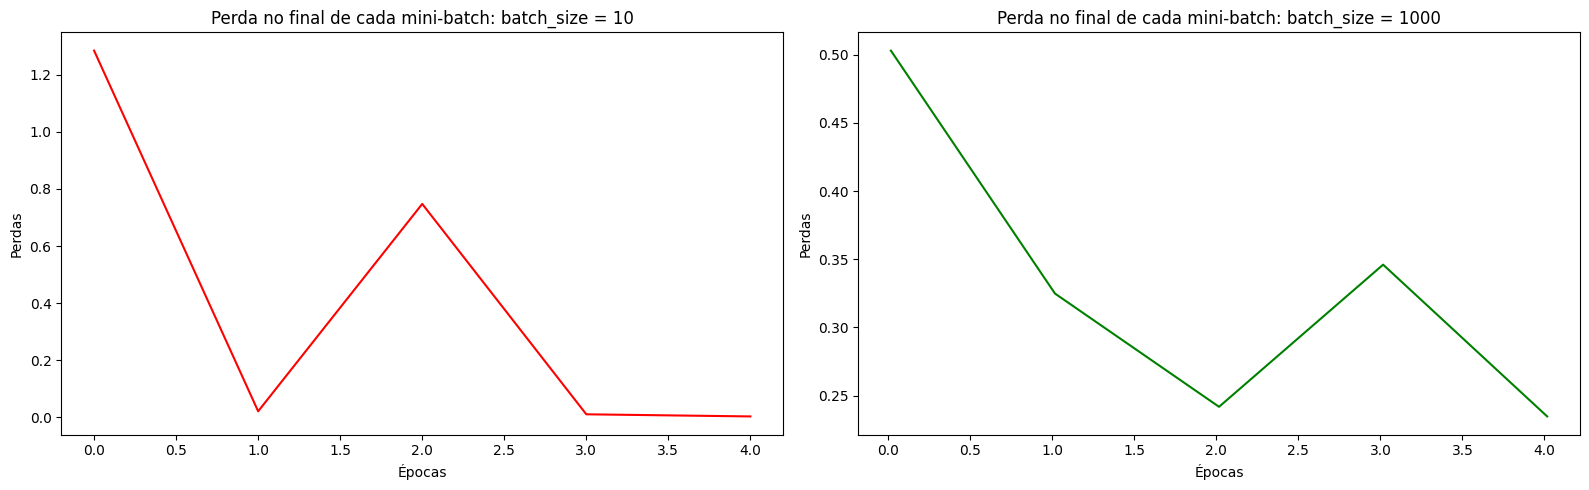

In [25]:
fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Perdas')
ax1.set_title('Perda no final de cada mini-batch: batch_size = 10')
ax1.plot(epochs_m[:5 * n_batches_train_m + 1:n_batches_train_m], losses_m[:5 * n_batches_train_m + 1:n_batches_train_m], c='red')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Perdas')
ax2.set_title('Perda no final de cada mini-batch: batch_size = 1000')
ax2.plot(epochs_M[:5 * n_batches_train_M + 1:n_batches_train_M], losses_M[:5 * n_batches_train_M + 1:n_batches_train_M], c='green')

plt.tight_layout()
plt.show()

## Conclusões sobre os experimentos deste notebook


**`apsb`**:
  * Com batch_size 10, ou seja 6000 minibatches, as perdas chegaram próximo a zero em algumas épocas, todavia o processo tardou bastante.
  * Já com 60 minibatches, batch_size = 1000, o treinamento foi rápido mas resultou em mais erros.
  * Dessa forma, para conjuntos de dados maiores, muitos minibatches poder requerer a necessidade do emprego de máquinas com GPU, devido ao peso computacional para treinar o modelo.